In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df['CHAS'].unique()

array([0., 1.])

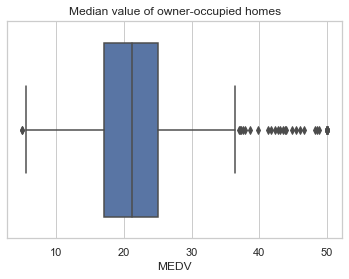

In [5]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=boston_df['MEDV'])
ax.set_title('Median value of owner-occupied homes')
plt.show()

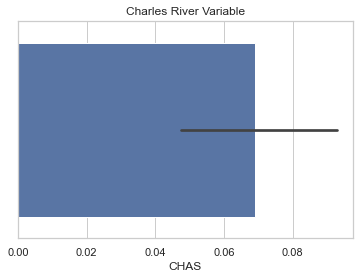

In [6]:
sns.set(style="whitegrid")
ax = sns.barplot(x=boston_df["CHAS"])
ax.set_title('Charles River Variable')
plt.show()

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


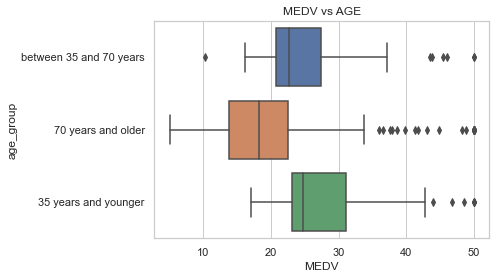

In [9]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
ax.set_title('MEDV vs AGE')
plt.show()

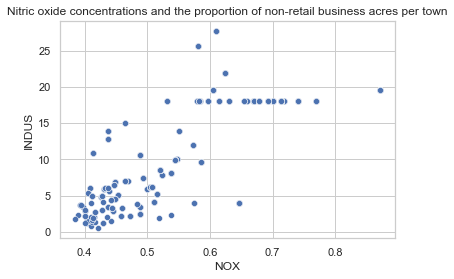

In [10]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title('Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

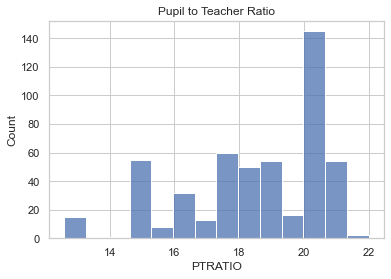

In [11]:
sns.set(style="whitegrid")
ax = sns.histplot(data=boston_df, x="PTRATIO")
ax.set_title('Pupil to Teacher Ratio')
plt.show()

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses for each proportion of owner occupied units built prior to 1940")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940")

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses for each proportion of owner occupied units built prior to 1940

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

*   $H\_0: β1$ = 0 (Weighted distance to the five Boston employment centers has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ ≠ 0 (Weighted distance to the five Boston employment centers has an effect on the median value of owner occupied homes)

In [15]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        12:43:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in Weighted distance to the five Boston employment centers based on the median value of owner occupied homes.